# Dataframe to N-Grams 

https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460

Dataset: https://www.kaggle.com/datasets/tarique7/airline-incidents-safety-data

### Airline Incidents Safety Data

The Airline Incidents Safety Data contains voluntary incident reports submitted by pilots, air traffic controllers and other aviation professionals. It includes data on equipment failures, the types of failures, and the corrective actions taken based on the conditions observed.  

#### Features:  

To identify the procedures taken to correct problems encountered with aircrafts and aircraft equipment, the following features are provided: 

+ Report: The incident report submitted by pilots, air traffic controllers and other aviation professionals describing the situation of the malfunction which has occurred. 

+ Part Failure: The location of the defective or malfunctioning part and its condition 

+ Occurrence Nature condition: The conditions observed. For example, warning indications, fluid loss, power loss, flame/fire, etc. 


### Importing libraries

In [2]:
import pandas as pd
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = {'covfefe'}

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Airline Occurences.csv')
df.head()

,Report,Part Failure,Occurence Nature condition,Occurence Precautionary Procedures
0,MECHANICAL / LANDING GEAR GND FAIL MSG AFTER T...,RT MLG BRAKE DAMAGED,WARNING INDICATION,OTHER
1,THE NOSE LANDING GEAR DID NOT EXTEND FULLY DUR...,ZONE 700 MALFUNCTIONED,WARNING INDICATION,ABORTED APPROACH
2,THE LEFT SIDE HYDRAULIC SYSTEM FILTER BOWL ASS...,HYD FILTER FAILED,OTHER,ABORTED APPROACH
3,AIRCRAFT WAS ON ROLLOUT DURING A NORMAL LANDIN...,LEFT COLLAPSED,OTHER,OTHER
4,UPON TAKEOFF ROLL BUT PRIOR TO REACHING 80 KNO...,ZONE 600 CRACKED,WARNING INDICATION,ABORTED TAKEOFF


In [13]:
df.shape

(100028, 4)

## Basic Cleaning

The function below inputs a list of words/text and returns a cleaned set of words by normalizing, encoding/decoding, lower casing, and lemmatizing.

In [5]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = WordNetLemmatizer()
  stop_words = set(stopwords.words('english')) | ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stop_words]

In [6]:
words = basic_clean(''.join(str(df['Report'].tolist())))

In [7]:
words[:20]

['mechanical',
 'landing',
 'gear',
 'gnd',
 'fail',
 'msg',
 'takeoff',
 'emergency',
 'declared',
 'brake',
 'overheat',
 'caution',
 'message',
 'erratic',
 'rt',
 'inboard',
 'pegged',
 'max',
 'temp',
 'mel']

### N-Grams

Determining which bigrams occur most often in the sample of incident reports. (Top 10)

In [8]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(iaw, srm)              19161
(removed, replaced)     16814
(per, amm)              14908
(per, srm)              12080
(aircraft, grounded)    11241
(aft, cargo)             9879
(corrective, action)     9312
(b737700, srm)           8821
(iaw, amm)               8745
(check, good)            8326
dtype: int64

Determining which trigrams occur most often in the sample of incident reports. (Top 10)

In [9]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(aircraft, base, maintenance)         7096
(iaw, b737700, srm)                   5967
(ops, check, good)                    4877
(verified, corrective, action)        3728
(aft, cargo, compartment)             3584
(fwd, cargo, compartment)             2807
(aft, cargo, bay)                     2650
(satisfactory, operational, check)    2569
(floor, sidewall, support)            2553
(located, drilled, new)               2202
dtype: int64

### Visualization

Assign result of n-grams to variables and visualizing the frequency count.

In [10]:
# 12 most frequent bigrams
bigram_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]

# 12 most frequent trigrams
trigram_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

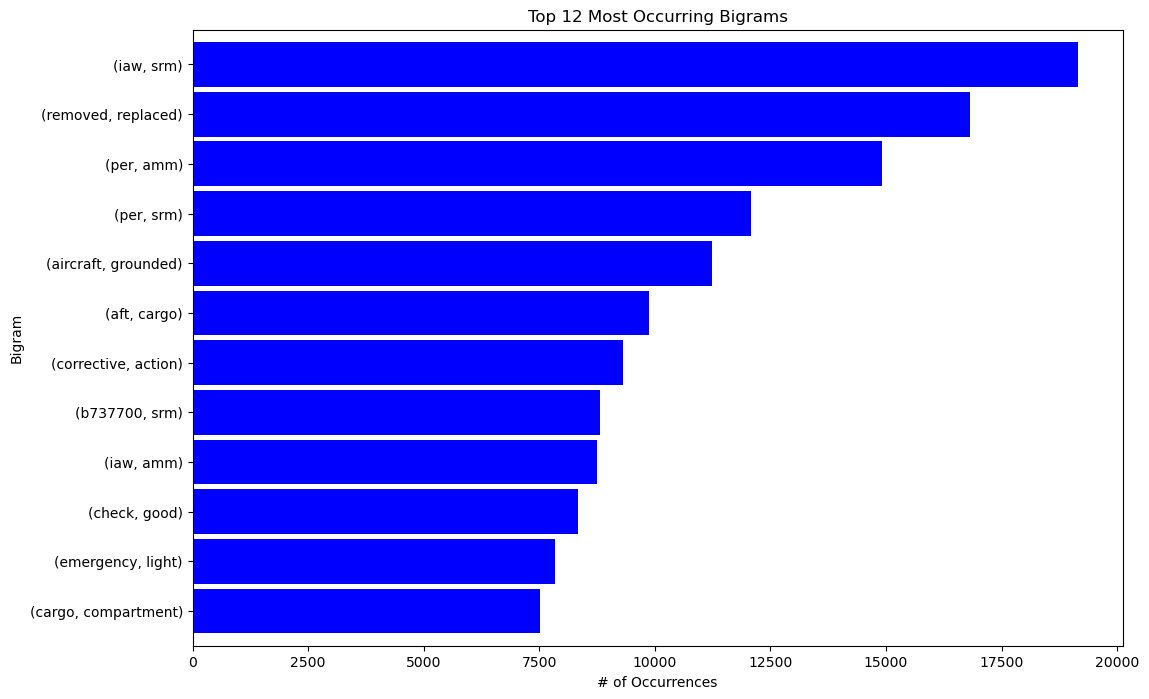

In [11]:
bigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 12 Most Occurring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurrences')
plt.show()

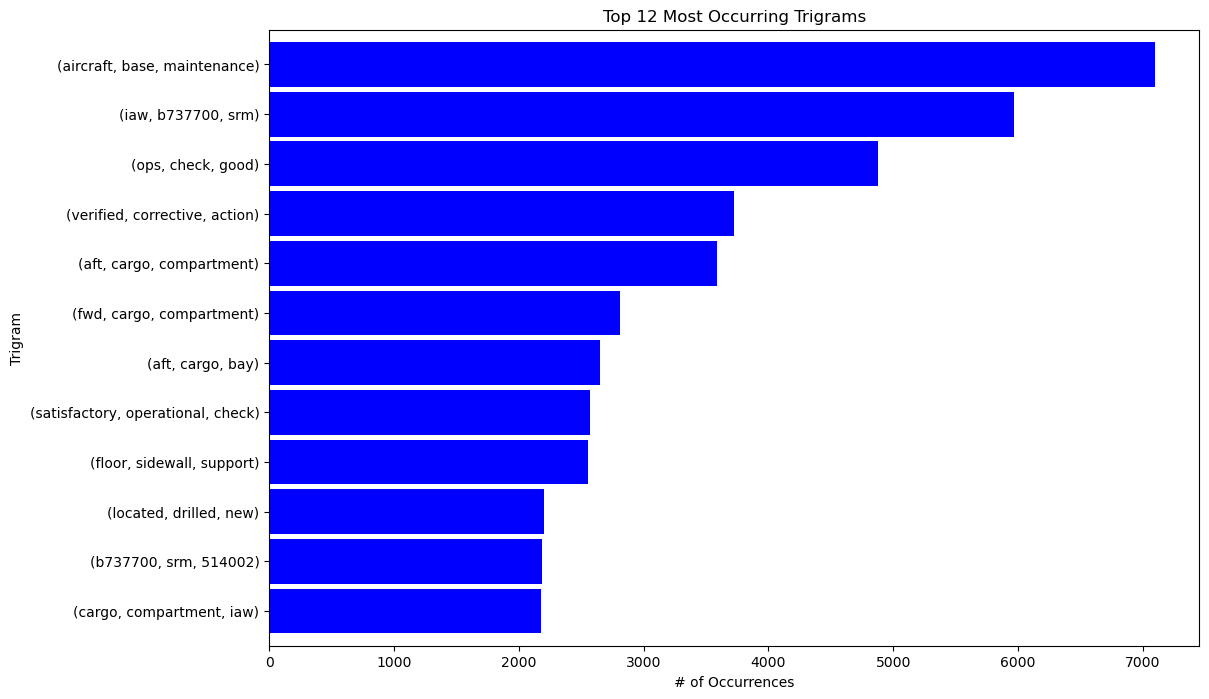

In [12]:
trigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Top 12 Most Occurring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurrences')
plt.show()